<a href="https://colab.research.google.com/github/kiransilaparasetty/Energy-website/blob/main/dlprojectipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow


In [ ]:
import tensorflow as tf

In [ ]:
mnist =tf.keras.datasets.mnist

In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
import matplotlib.pyplot as plt


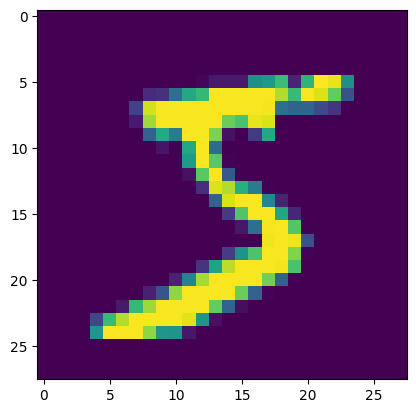

In [ ]:
plt.imshow(x_train[0])
plt.show()


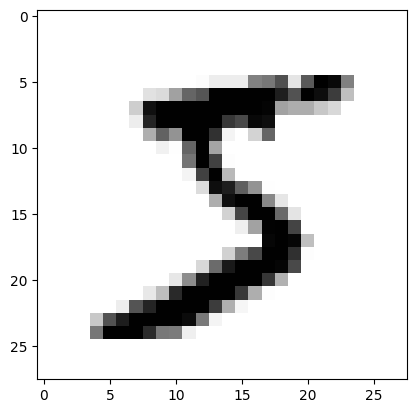

In [ ]:
plt.imshow(x_train[0],cmap=plt.cm.binary)## converted image to binary

In [ ]:
print(x_train[0])## before normalization

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [ ]:
print(y_train[0])

5


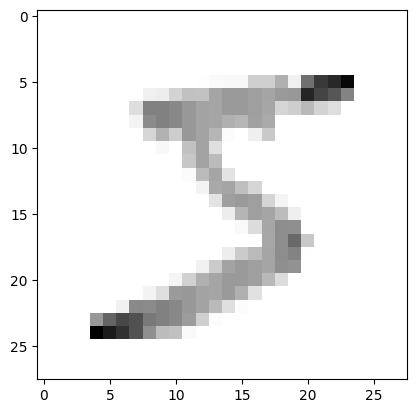

In [ ]:
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)
plt.imshow(x_train[0],cmap=plt.cm.binary)

In [ ]:
print(x_train[0])## after normalization

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [ ]:
print(y_train[0])

5


In [ ]:
import numpy as np
img_size=28
x_trainr=np.array(x_train).reshape(-1,img_size,img_size,1)
x_testr=np.array(x_test).reshape(-1,img_size,img_size,1)
print("training sample dimensions",x_trainr.shape)
print("testing sample dimensions",x_testr.shape)

training sample dimensions (60000, 28, 28, 1)
testing sample dimensions (10000, 28, 28, 1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D

In [ ]:
model = Sequential()
# Add convolutional layers
model.add(Conv2D(64, (3, 3), input_shape=x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output and add fully connected layers
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(32))
model.add(Activation("relu"))

# Output layer
model.add(Dense(10))
model.add(Activation("softmax"))

In [ ]:
print(len(x_trainr))

60000


In [ ]:
print(len(y_train))

60000


In [ ]:
print(len(x_testr))

10000


In [ ]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

In [ ]:
model.fit(x_trainr, y_train, epochs=5, validation_split=0.3)

Epoch 1/5
1313/1313 [==============================] - 73s 55ms/step - loss: 0.3448 - accuracy: 0.8918 - val_loss: 0.1454 - val_accuracy: 0.9544
Epoch 2/5
1313/1313 [==============================] - 70s 53ms/step - loss: 0.1055 - accuracy: 0.9670 - val_loss: 0.0968 - val_accuracy: 0.9699
Epoch 3/5
1313/1313 [==============================] - 71s 54ms/step - loss: 0.0780 - accuracy: 0.9762 - val_loss: 0.0859 - val_accuracy: 0.9731
Epoch 4/5
1313/1313 [==============================] - 70s 53ms/step - loss: 0.0610 - accuracy: 0.9809 - val_loss: 0.0640 - val_accuracy: 0.9788
Epoch 5/5
1313/1313 [==============================] - 71s 54ms/step - loss: 0.0472 - accuracy: 0.9857 - val_loss: 0.0777 - val_accuracy: 0.9767


In [ ]:
Predictions=model.predict([x_testr])

313/313 [==============================] - 5s 16ms/step


In [ ]:
print(Predictions)

[[1.0012003e-09 6.0768753e-06 6.5601125e-06 ... 9.9995297e-01
  6.2487572e-08 2.5258103e-06]
 [6.4340199e-04 7.1742565e-05 9.9923992e-01 ... 1.0115118e-05
  9.1073133e-07 9.1668071e-06]
 [5.8532947e-07 9.9998134e-01 3.4621678e-06 ... 7.5773556e-07
  7.0238997e-07 3.8593676e-06]
 ...
 [3.7069753e-10 2.7328039e-07 7.4661237e-09 ... 1.8853057e-06
  5.5422420e-06 6.9107773e-06]
 [7.4363115e-08 2.6013687e-09 1.1188576e-10 ... 1.7292696e-09
  8.0448388e-07 4.1341637e-09]
 [1.2320463e-04 1.2971920e-07 1.3858150e-04 ... 8.4881202e-07
  3.6027344e-05 1.8683930e-05]]


In [ ]:
print(np.argmax(Predictions[6]))

4


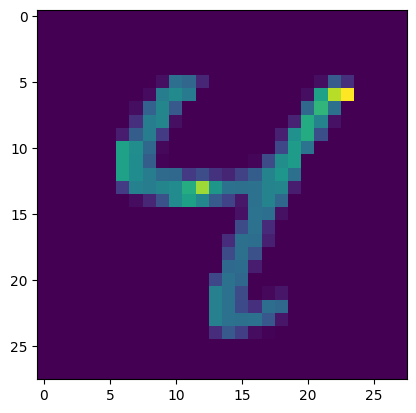

In [ ]:
plt.imshow(x_testr[6])

In [ ]:
import cv2

In [ ]:
img=cv2.imread("ZERO.png")

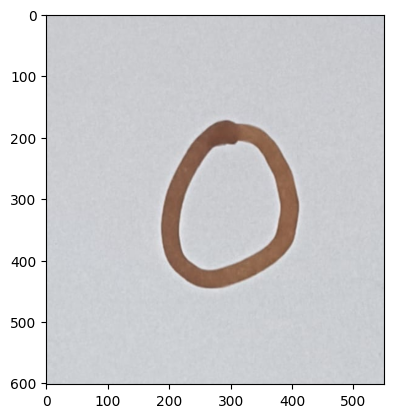

In [ ]:
plt.imshow(img)#this is wrting by me in notebook and called here for checking the acuuray

In [ ]:
img.shape

(725, 730, 3)

In [ ]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [ ]:
RESIZE=cv2.resize(gray,(28,28),interpolation=cv2.INTER_AREA)

In [ ]:
RESIZE.shape

(28, 28)

In [ ]:
new_img=tf.keras.utils.normalize(RESIZE,axis=1)

In [ ]:
new_img=np.array(new_img).reshape(-1,img_size,img_size,1)

In [ ]:
new_img.shape

(1, 28, 28, 1)

In [ ]:
print(np.argmax(TESTING_img))

0


In [ ]:
TESTING_img=model.predict(new_img)

1/1 [==============================] - 0s 101ms/step


In [ ]:
print(RESIZE)

[[209 210 210 211 210 210 211 211 211 211 211 211 212 212 212 212 213 213
  213 213 213 214 214 214 214 214 214 213]
 [209 209 210 210 210 210 211 211 211 211 211 211 212 211 212 212 213 213
  213 214 213 213 214 213 214 214 214 213]
 [208 209 210 210 210 211 211 210 211 210 211 211 211 212 212 212 213 213
  213 213 213 213 214 214 214 214 214 213]
 [209 209 210 210 210 210 210 210 211 210 210 211 211 212 212 212 212 213
  213 213 213 213 214 213 214 214 213 213]
 [209 209 208 207 206 206 205 205 205 205 206 206 206 206 206 207 207 208
  208 208 207 208 207 208 208 208 207 207]
 [208 207 204 203 201 199 198 198 198 198 199 199 199 199 199 199 198 199
  200 199 199 199 200 199 200 200 199 198]
 [207 204 200 197 194 192 192 192 192 192 192 192 192 192 192 192 194 188
  192 192 192 192 192 192 191 191 191 191]
 [205 201 196 191 188 186 185 185 183 128 139 131 133 124 114 104  91  83
  133 185 184 184 184 184 183 183 183 183]
 [203 197 192 186 183 182 182 181 167  76 116  97 112 127 139 14